## GARCH Model

### Description:

In this notebook we will implement the code for a **GARCH Model** in order to make Financial **Time Series Forecasting**.

Most of the notebook will be the same as in the **ARIMA** notebook, since the pre-process the the series must have is quite similar.

As explained in the **SeriesAnalysis** notebook, this notebook will use the results already obtained in **Series Analysis**, so that the focus can be only on the Model itself.

### GARCH Model Brief Introduction

## COMPLETE

In [1]:
### Some useful functions
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model

### Some useful functions


In [5]:
#Read and filter data from csv files, as well as handle missing values
def read_filter(path,index,value,freq):
    df = pd.read_csv(path)
    series = df.loc[:,[index,value]]
    series.set_index(index,inplace=True)
    series.index=pd.to_datetime(series.index)
    series = series.asfreq('d')
    series = series.interpolate()
    return series

#Ploting a single time series
def plot_series(serie,title,xlabel,ylabel):
    plt.figure()
    plt.plot(serie)
    plt.title=title
    plt.xlabel=xlabel
    plt.ylabel=ylabel
    plt.show()
    
    
# differentiate the series
def diff(series,t):
    for i in range(t):
        series = series - series.shift(1)
        series = series.dropna()
    
    return series

#train test split
def train_test(serie,numtest):
    train = serie.iloc[0:len(serie)-numtest]
    test = serie.iloc[len(serie)-numtest:]    
    return train, test
    
#Compute some error metrics
def errors(actual, predicted):
    mape = np.mean(np.abs(predicted - actual)/np.abs(actual))  # MAPE
    me = np.mean(predicted - actual)             # ME
    mae = np.mean(np.abs(predicted - actual))    # MAE
    mpe = np.mean((predicted - actual)/actual)   # MPE
    rmse = np.mean((predicted - actual)**2)**.5  # RMSE
    
    errors = [['MAPE',mape],['ME',me],['MAE',mae],['MPE',mpe],['RMSE',rmse]]
    
    errors = pd.DataFrame(errors,columns=['Error','Value'])
    return errors



In [6]:
#Importing the dataset and making some changes
USD_CAD_serie = read_filter('../data/CAD=X.csv','Date','Adj Close','w')
USD_BRL_serie = read_filter('../data/BRL=X.csv','Date','Adj Close','w')
AmericanAirlines_serie = read_filter('../data/AAL2010_2019.csv','Date','Adj Close','w')

#differentiating the series
USD_CAD_serie_diff1 = diff(USD_CAD_serie,1)
USD_BRL_serie_diff1 = diff(USD_BRL_serie,1)
AmericanAirlines_serie_diff1 = diff(AmericanAirlines_serie,1)

## Train and Test Split

In [7]:
largest_horizon = 12 # 12 weeks, 3 months

train_American_diff1, test_American_diff1 = train_test(AmericanAirlines_serie_diff1,12)
train_USD_CAD_diff1, test_USD_CAD_diff1 = train_test(USD_CAD_serie_diff1,12)
train_USD_BRL_diff1, test_USD_BRL_diff1 = train_test(USD_BRL_serie_diff1,12)

## Fit ARIMA+GARCH Model

In [9]:
arima_American_diff1 = ARIMA(train_American_diff1,order=(1,0,1)).fit()
arima_USD_CAD_diff1 = ARIMA(train_USD_CAD_diff1,order=(1,0,1)).fit()
arima_USD_BRL_diff1 = ARIMA(train_USD_BRL_diff1,order=(1,0,1)).fit()

garch_American_diff1 = arch_model(arima_American_diff1.resid, vol='Garch', p=1, o=0, q=1, dist='Normal').fit()
garch_USD_CAD_diff1 = arch_model(arima_USD_CAD_diff1.resid, vol='Garch', p=1, o=0, q=1, dist='Normal').fit()
garch_USD_BRL_diff1 = arch_model(arima_USD_BRL_diff1.resid, vol='Garch', p=1, o=0, q=1, dist='Normal').fit()

C:\Users\matno\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Iteration:      1,   Func. Count:      6,   Neg. LLF: 109984891.87394111
Iteration:      2,   Func. Count:     17,   Neg. LLF: 3578.1855827930244
Iteration:      3,   Func. Count:     24,   Neg. LLF: 47555.29349965341
Iteration:      4,   Func. Count:     30,   Neg. LLF: 2179938932.3729715
Iteration:      5,   Func. Count:     41,   Neg. LLF: 715393.9523573071
Iteration:      6,   Func. Count:     51,   Neg. LLF: -2888.021541758713
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2888.021501326287
            Iterations: 10
            Function evaluations: 51
            Gradient evaluations: 6
Iteration:      1,   Func. Count:      5,   Neg. LLF: -22050.216957599157
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -22050.217016308117
            Iterations: 1
            Function evaluations: 5
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      5,   Neg. LLF: -15882.267680383016


C:\Users\matno\miniconda3\lib\site-packages\arch\univariate\base.py:292: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0148. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\matno\miniconda3\lib\site-packages\arch\univariate\base.py:292: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.023e-06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1000 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\matno\miniconda3\lib\site-packages\arch\univariate\base.py:707: Conv

## Forecasting


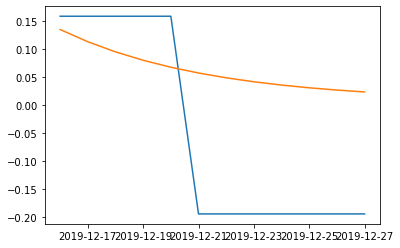

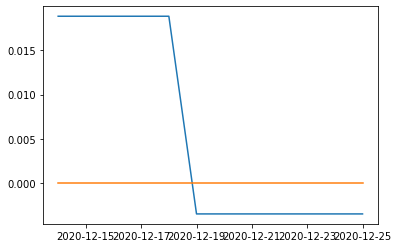

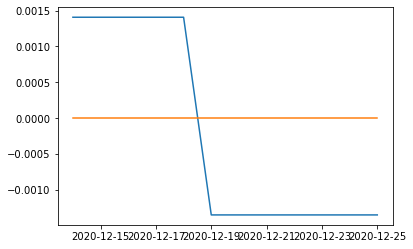

In [12]:
arima_for_American = arima_American_diff1.predict(start=test_American_diff1.index.astype(str)[0],end=test_American_diff1.index.astype(str)[-1])
arima_for_BRL = arima_USD_BRL_diff1.predict(start=test_USD_BRL_diff1.index.astype(str)[0],end=test_USD_BRL_diff1.index.astype(str)[-1])
arima_for_CAD = arima_USD_CAD_diff1.predict(start=test_USD_CAD_diff1.index.astype(str)[0],end=test_USD_CAD_diff1.index.astype(str)[-1])

garch_for_American = garch_American_diff1.forecast(horizon=12)
garch_for_BRL = garch_USD_BRL_diff1.forecast(horizon=12)
garch_for_CAD = garch_USD_CAD_diff1.forecast(horizon=12)

for_American = arima_for_American.copy(deep=True)
for_BRL = arima_for_BRL.copy(deep=True)
for_CAD = arima_for_CAD.copy(deep=True)

for i in range(12):
    for_American[i] += garch_for_American.mean.iloc[-1][i]
    for_BRL = garch_for_BRL.mean.iloc[-1][i]
    for_CAD = garch_for_CAD.mean.iloc[-1][i]

comp_for_American = test_American_diff1.copy(deep=True)
comp_for_BRL = test_USD_BRL_diff1.copy(deep=True)
comp_for_CAD = test_USD_CAD_diff1.copy(deep=True)

comp_for_American['Forecast'] =for_American
comp_for_BRL['Forecast'] = for_BRL
comp_for_CAD['Forecast'] = for_CAD


plt.figure()
plt.plot(comp_for_American)
plt.figure()
plt.plot(comp_for_BRL)
plt.figure()
plt.plot(comp_for_CAD);

In [13]:
for_errors_American_diff1 = errors(comp_for_American['Adj Close'],comp_for_American['Forecast'])
for_errors_USD_CAD_diff1 = errors(comp_for_CAD['Adj Close'],comp_for_CAD['Forecast'])
for_errors_USD_BRL_diff1 = errors(comp_for_BRL['Adj Close'],comp_for_BRL['Forecast'])

print('American')
print(for_errors_American_diff1)
print('USD/BRL')
print(for_errors_USD_BRL_diff1)
print('USD/CAD')
print(for_errors_USD_CAD_diff1)

American
  Error     Value
0  MAPE  0.856045
1    ME  0.110645
2   MAE  0.161273
3   MPE -0.856045
4  RMSE  0.183140
USD/BRL
  Error     Value
0  MAPE  1.000513
1    ME -0.005821
2   MAE  0.009902
3   MPE -1.000513
4  RMSE  0.012469
USD/CAD
  Error     Value
0  MAPE  1.000032
1    ME  0.000204
2   MAE  0.001376
3   MPE -1.000032
4  RMSE  0.001377
